# Social Ads Forecasting
Predict sales revenue by social advertisment spent

In [102]:
import pandas as pd
import seaborn as sns

In [103]:
df = pd.read_excel("https://github.com/theleadio/datascience_demo/blob/master/social-ads-raw.xlsx?raw=true")

In [104]:
df

,segment,google,facebook,instagram,sales,size,area
0,1,230.1,37.8,69.2,22.1,large,rural
1,2,44.5,39.3,45.1,10.4,small,urban
2,3,17.2,45.9,69.3,9.3,small,rural
3,4,151.5,41.3,58.5,18.5,small,urban
4,5,180.8,10.8,58.4,12.9,large,suburban
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,suburban
196,197,94.2,4.9,8.1,9.7,small,urban
197,198,177.0,9.3,6.4,12.8,small,suburban
198,199,283.6,42.0,66.2,25.5,small,rural


The unit for social ads is in x 1000 USD<br>
The unit for sales is x 1000 units

<AxesSubplot:xlabel='instagram', ylabel='sales'>

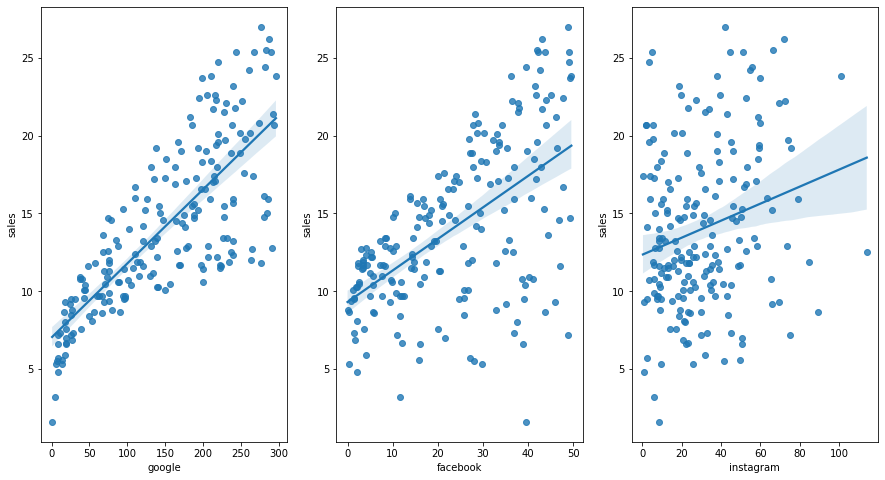

In [105]:
import matplotlib.pyplot as plt
fig, subs = plt.subplots(1,3, figsize = (15,8))
sns.regplot(data = df, x = "google", y = "sales", ax = subs[0])
sns.regplot(data = df, x = "facebook", y = "sales", ax = subs[1])
sns.regplot(data = df, x = "instagram", y = "sales", ax = subs[2])

Google and Facebook sales are quite linear but not so much for instagram

## Creating a Linear Regression Models

### Google Ads

In [106]:
columns = ["google"]
x = df[columns]
y = df["sales"]

In [107]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

**The R-square value**

In [108]:
model.score(x,y) # R-square

0.611875050850071

In [109]:
print("Intercept = ", model.intercept_)
print("Coefficient = ", model.coef_)

Intercept =  7.032593549127693
Coefficient =  [0.04753664]


#### Predicting sales for different social ads

Question: 

>How many sales can we make if we spent 20k USD on Google Ads?

In [110]:
# y = mx + c
y = 0.04753664 * 20 +  7.032593549127693
print("Predicted ", round(y * 1000), "units")

Predicted  7983 units


### Facebook Ads

In [111]:
columns = ["facebook"]
x = df[columns]
y = df["sales"]

In [112]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

**The R-square value**

In [113]:
model.score(x,y) # R-square

0.33203245544529525

In [114]:
print("Intercept = ", model.intercept_)
print("Coefficient = ", model.coef_)

Intercept =  9.311638095158283
Coefficient =  [0.20249578]


#### Predicting sales for different social ads

Question: 

>How many sales can we make if we spent 20k USD on Facebook Ads?

In [115]:
y_pred = model.predict([[20]])
print("Predicted ", round(y_pred[0] * 1000), "units")

Predicted  13362 units


c:\Users\CJY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Instagram Ads

In [116]:
columns = ["instagram"]
x = df[columns]
y = df["sales"]

In [117]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

**The R-square value**

In [118]:
model.score(x,y) # R-square

0.05212044544430516

In [119]:
print("Intercept = ", model.intercept_)
print("Coefficient = ", model.coef_)

Intercept =  12.351407069278162
Coefficient =  [0.0546931]


#### Predicting sales for different social ads

Question: 

>How many sales can we make if we spent 20k USD on Facebook Ads?

In [120]:
y_pred = model.predict([[20]])
print("Predicted ", round(y_pred[0] * 1000), "units")

Predicted  13445 units


c:\Users\CJY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Inferences

Ranking of social ads performance from best to worst when you spend 20k USD on ads
1. Instagram
2. Facebook
3. Google

Instagram and Facebook perform quite similarly whereas Google is discernably worse

## Multi Variable/Feature Linear Regression Model


In [121]:
columns = ["google", "facebook", "instagram"]
x = df[columns]
y = df["sales"]

In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

**The R-square value**

Adding more variables(features) will improve R-square value

In [123]:
model.score(x,y) # R-square

0.8972106381789522

In [124]:
print("Intercept = ", model.intercept_)
print("Coefficient = ", model.coef_)

Intercept =  2.9388893694594085
Coefficient =  [ 0.04576465  0.18853002 -0.00103749]


- 0.045 for google
- 0.188 for facebook
- -0.001 for instagram

Instagram does not have a linear relationship with our product sales

In [125]:
df

,segment,google,facebook,instagram,sales,size,area
0,1,230.1,37.8,69.2,22.1,large,rural
1,2,44.5,39.3,45.1,10.4,small,urban
2,3,17.2,45.9,69.3,9.3,small,rural
3,4,151.5,41.3,58.5,18.5,small,urban
4,5,180.8,10.8,58.4,12.9,large,suburban
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,suburban
196,197,94.2,4.9,8.1,9.7,small,urban
197,198,177.0,9.3,6.4,12.8,small,suburban
198,199,283.6,42.0,66.2,25.5,small,rural


We can add size and area as features for our models too

### Converting the columns to  quantifiable values

In [126]:
df["is_large"] = df["size"].map({ "small": 0, "large": 1})

In [127]:
area_dummies = pd.get_dummies(df["area"])
df = df.join(area_dummies)
df


,segment,google,facebook,instagram,sales,size,area,is_large,rural,suburban,urban
0,1,230.1,37.8,69.2,22.1,large,rural,1,1,0,0
1,2,44.5,39.3,45.1,10.4,small,urban,0,0,0,1
2,3,17.2,45.9,69.3,9.3,small,rural,0,1,0,0
3,4,151.5,41.3,58.5,18.5,small,urban,0,0,0,1
4,5,180.8,10.8,58.4,12.9,large,suburban,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,suburban,0,0,1,0
196,197,94.2,4.9,8.1,9.7,small,urban,0,0,0,1
197,198,177.0,9.3,6.4,12.8,small,suburban,0,0,1,0
198,199,283.6,42.0,66.2,25.5,small,rural,0,1,0,0


Building the model with more features

In [128]:
columns = ["google", "facebook", "instagram", "is_large", "rural","suburban", "urban"]
x = df[columns]
y = df["sales"]

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

**The R-square value**

Adding more variables(features) will improve R-square value

In [130]:
model.score(x,y) # R-square

0.8981611875394304

In [131]:
print("Intercept = ", model.intercept_)
print("Coefficient = ", model.coef_)

Intercept =  2.928049332918782
Coefficient =  [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.05385834 -0.16042133
  0.21427968]


In [137]:
y_pred = model.predict([[50, 30, 20, 0, 0 , 0, 1]])

c:\Users\CJY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [139]:
unit_price = 5000
expected_revenue = y_pred[0] * 1000 * unit_price
print(f"Expected revenue: {expected_revenue:,.2f} USD")


Expected revenue: 55,218,882.20 USD
